In [128]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
from scipy import stats
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split
# from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoLarsCV


In [129]:
raw_data=pd.read_csv('apple_stock.csv',parse_dates=['Date'])
dataset_1=raw_data.copy()
dataset_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


In [130]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2475 non-null   datetime64[ns]
 1   Open       2475 non-null   float64       
 2   High       2475 non-null   float64       
 3   Low        2475 non-null   float64       
 4   Close      2475 non-null   float64       
 5   Adj Close  2475 non-null   float64       
 6   Volume     2475 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 135.5 KB


In [131]:
dataset_1.describe(include='all')

C:\Users\user\AppData\Local\Temp\ipykernel_15520\2981851859.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset_1.describe(include='all')


,Date,Open,High,Low,Close,Adj Close,Volume
count,2475,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
unique,2475,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2014-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,76.004968,76.845661,75.213720,76.064199,74.097124,1.380565e+08
std,NaN,54.739063,55.389713,54.134658,54.787600,55.248195,8.399674e+07
min,NaN,17.684999,17.911785,17.626785,17.849285,15.648315,3.145820e+07
25%,NaN,29.592500,29.841249,29.371249,29.707500,27.131330,8.300500e+07


In [132]:
dataset_2=dataset_1.copy()

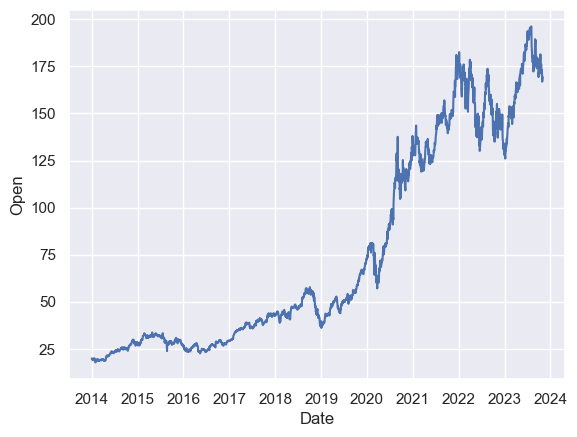

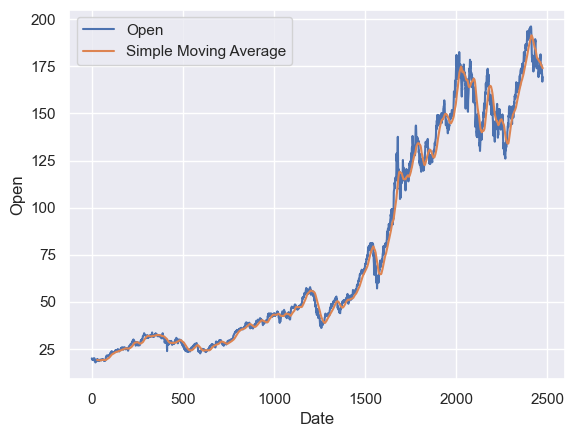

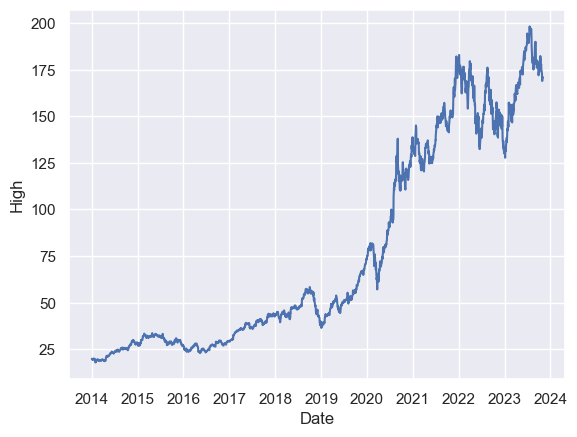

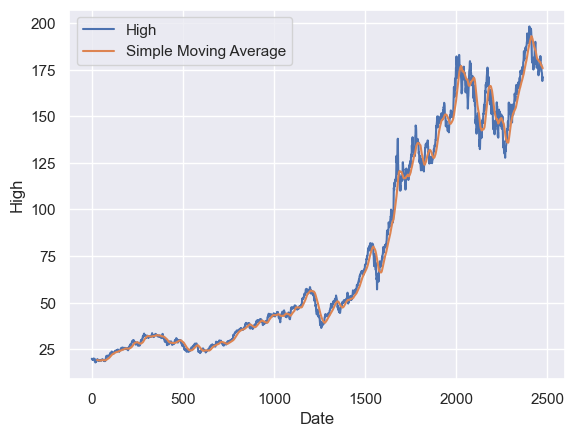

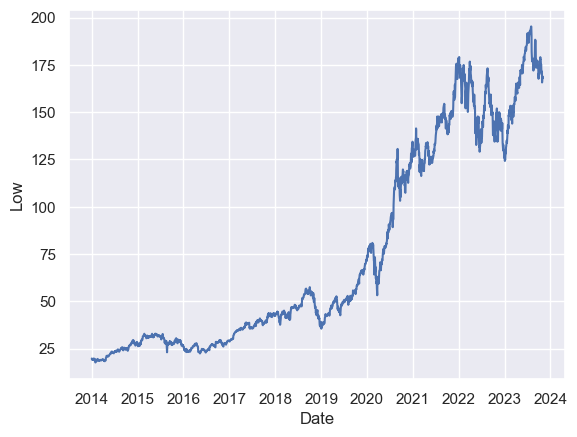

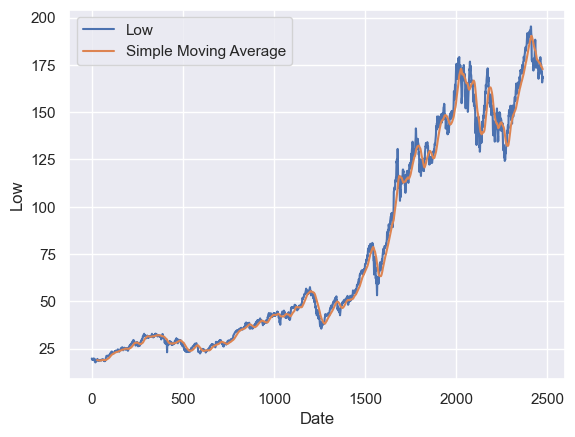

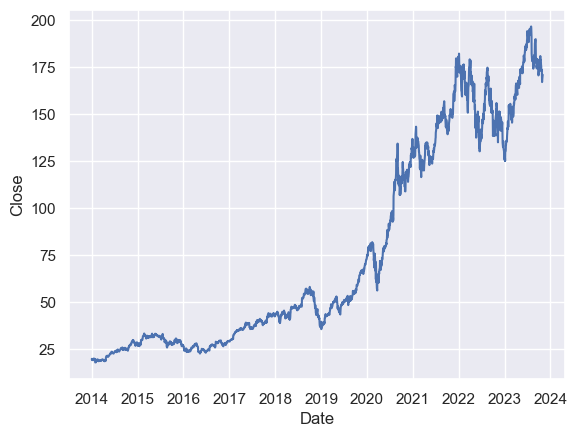

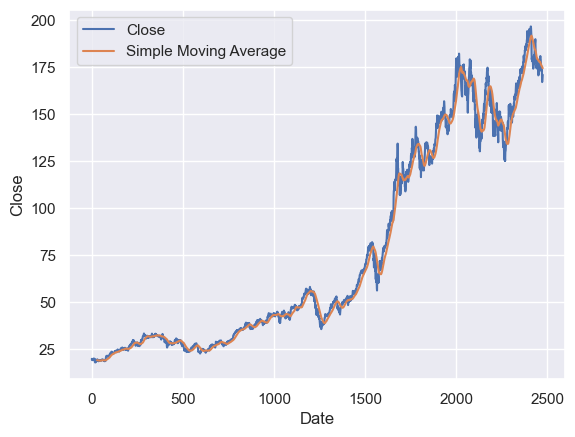

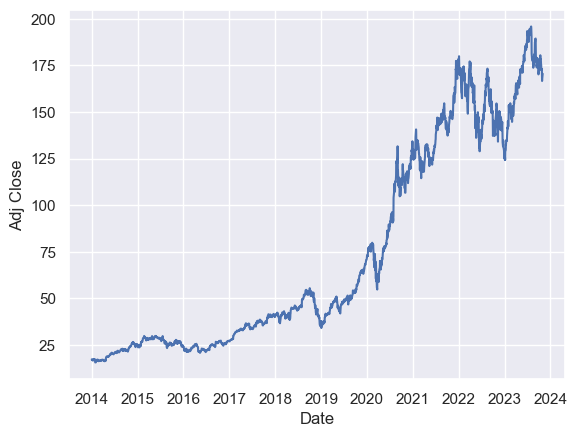

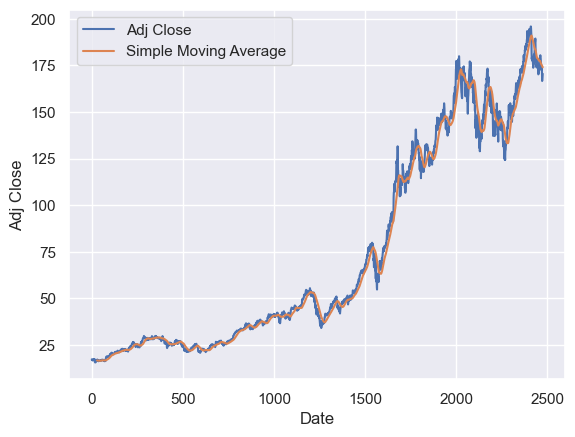

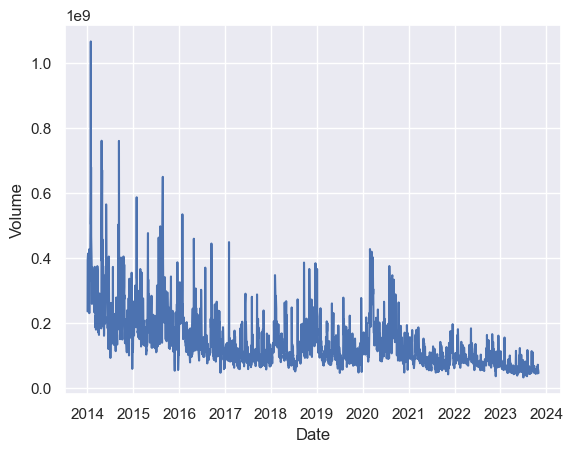

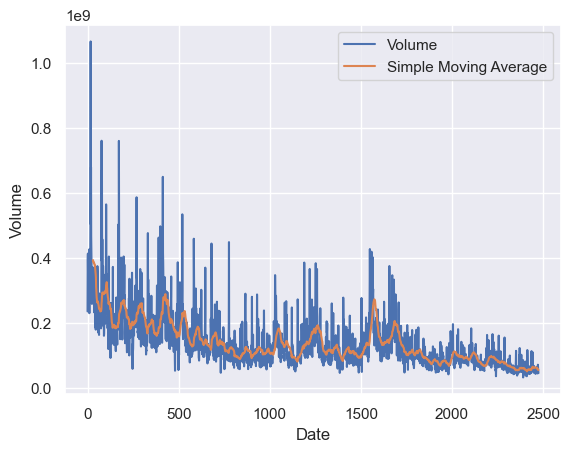

In [133]:
co=dataset_2.drop('Date',axis=1)
for col in co:
    dataset_2['Simple Moving Average']=dataset_2[col].rolling(30).mean()
    plt.subplots(1,1)
    # plt.legend()
    sns.lineplot(x=dataset_2['Date'],y=dataset_2[col])
    dataset_2[[col,'Simple Moving Average']].plot()
    plt.xlabel('Date')
    plt.ylabel(col)
    dataset_2.drop('Simple Moving Average',axis=1,inplace=True)


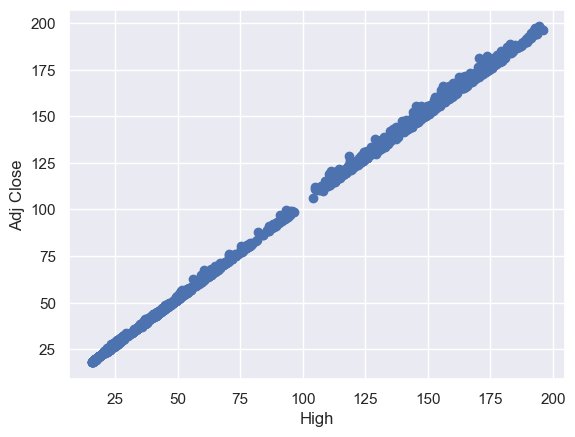

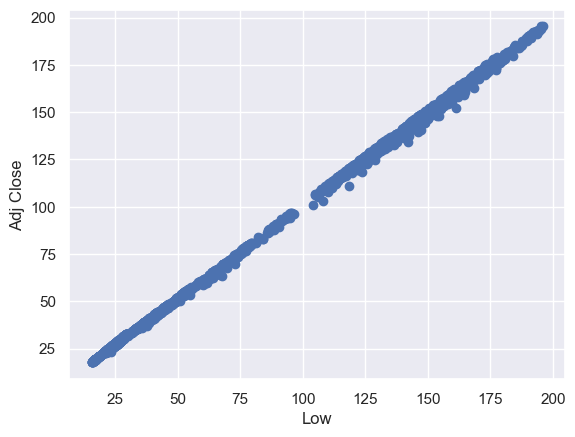

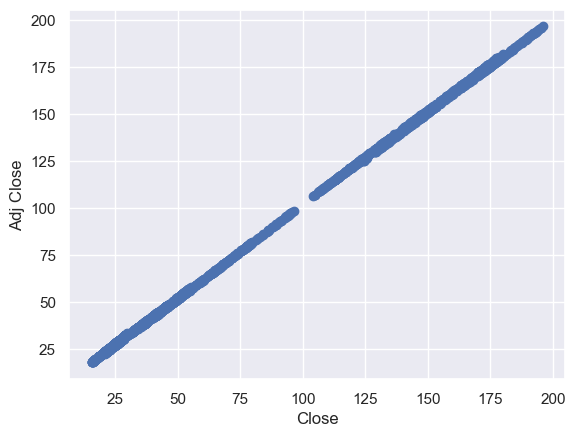

In [134]:
cow=dataset_2[['High','Low','Close']]
for col in cow:
    plt.subplots(1,1)
    plt.scatter(dataset_1['Adj Close'],dataset_1[col] )
    a=dataset_1.groupby(col[:])
    plt.xlabel(col)
    plt.ylabel('Adj Close')


In [135]:
dataset_2['year']=dataset_2['Date'].dt.year
dataset_2

,Date,Open,High,Low,Close,Adj Close,Volume,year
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800,2014
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600,2014
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800,2014
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200,2014
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600,2014
...,...,...,...,...,...,...,...,...
2470,2023-10-25,171.880005,173.059998,170.649994,171.100006,170.874893,57157000,2023
2471,2023-10-26,170.369995,171.380005,165.669998,166.889999,166.670425,70625300,2023
2472,2023-10-27,166.910004,168.960007,166.830002,168.220001,167.998672,58499100,2023
2473,2023-10-30,169.020004,171.169998,168.869995,170.289993,170.065933,51131000,2023


In [136]:
d=dataset_2['Date'].dt.month
month=[]
for i in d:
    if i ==1:
        month.append("January")
    if i ==2:
        month.append("February")
    if i ==3:
        month.append("March")
    if i ==4:
        month.append("April")
    if i ==5:
        month.append("May")
    if i ==6:
        month.append("June")
    if i ==7:
        month.append("July")
    if i ==8:
        month.append("August")
    if i ==9:
        month.append("September")
    if i ==10:
        month.append("October")
    if i ==11:
        month.append("November")
    if i ==12:
        month.append("December")


d=pd.DataFrame(month)
dataset_2['month'] = d
dataset_2

,Date,Open,High,Low,Close,Adj Close,Volume,year,month
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800,2014,January
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600,2014,January
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800,2014,January
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200,2014,January
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600,2014,January
...,...,...,...,...,...,...,...,...,...
2470,2023-10-25,171.880005,173.059998,170.649994,171.100006,170.874893,57157000,2023,October
2471,2023-10-26,170.369995,171.380005,165.669998,166.889999,166.670425,70625300,2023,October
2472,2023-10-27,166.910004,168.960007,166.830002,168.220001,167.998672,58499100,2023,October
2473,2023-10-30,169.020004,171.169998,168.869995,170.289993,170.065933,51131000,2023,October


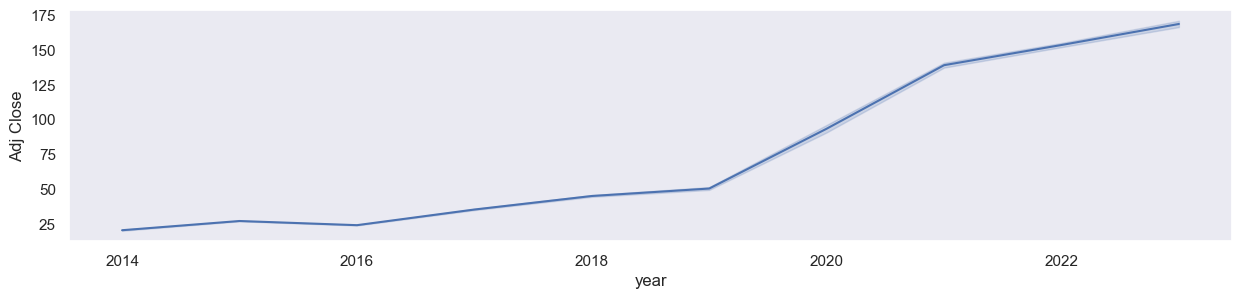

In [137]:
plt.figure(figsize=(15, 3))
sns.lineplot(x="year", y="Adj Close", data=dataset_2)
plt.xlabel('year')
plt.ylabel('Adj Close')
plt.grid()
plt.show()

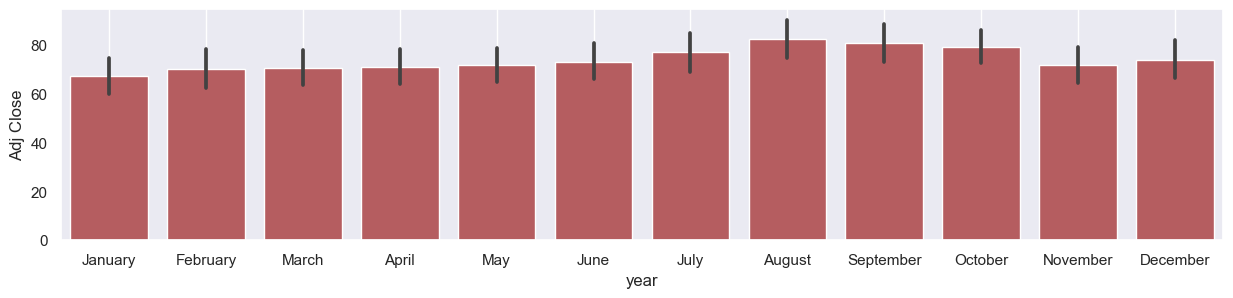

'April'

In [138]:
plt.figure(figsize=(15, 3))
sns.barplot(x="month", y="Adj Close", data=dataset_2,color='r')
plt.xlabel('year')
plt.ylabel('Adj Close')
plt.grid()
plt.show()


<Axes: >

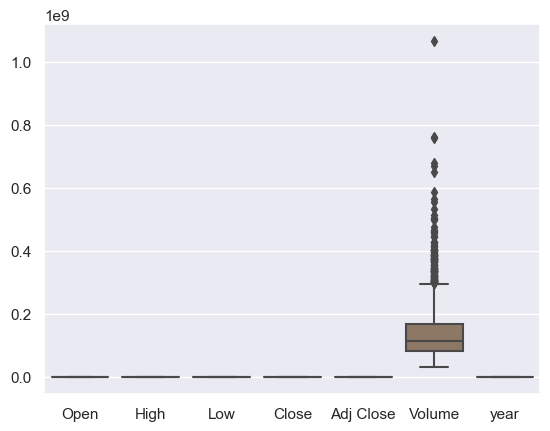

In [140]:
sns.boxplot(dataset_2)

In [141]:

dataset_2['log_Volume']=np.log(dataset_2['Volume'])

<Axes: >

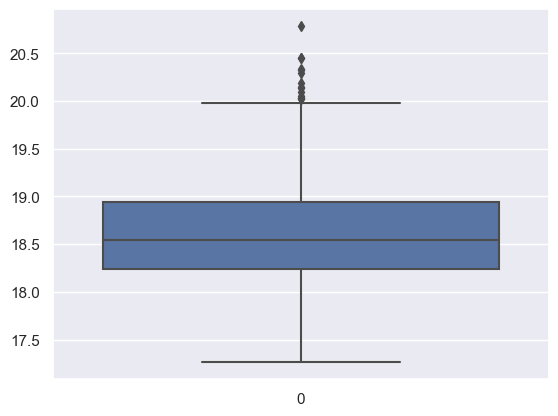

In [142]:
sns.boxplot(dataset_2['log_Volume'])

In [143]:
Q1 = dataset_2['log_Volume'].quantile(0.25)
Q3 =dataset_2['log_Volume'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
upper_array = np.where(dataset_2['log_Volume'] >= upper)[0]
lower_array = np.where(dataset_2['log_Volume'] <= lower)[0]
 
dataset_2.drop(index=upper_array, inplace=True)
dataset_2.drop(index=lower_array, inplace=True)
 

<Axes: >

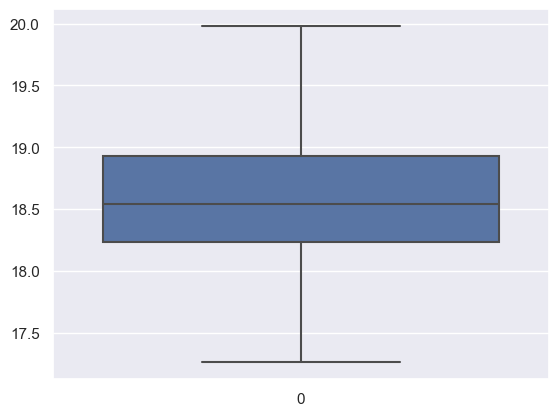

In [144]:
sns.boxplot(dataset_2['log_Volume'])

In [145]:
enc=LabelEncoder()
dataset_2['month']=enc.fit_transform(dataset_2['month'])


In [146]:
dataset_2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,log_Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800,2014,4,19.273754
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600,2014,4,19.787965
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800,2014,4,19.838015
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200,2014,4,19.575072
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600,2014,4,19.370521


In [147]:
x=dataset_2[['Open','High','Low','log_Volume','year','month']]
y=dataset_2['Close']

In [148]:
scale=StandardScaler()
x_scale=scale.fit_transform(x)


In [149]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.2,random_state=42)

In [154]:
estimators = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(random_state=42)),
    ('la',LassoLarsCV())
]
reg = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Squared Error:', mse)
print('Squared Mean Squared Error:', np.sqrt(mse))
print('r2_score:',r2_score)
print('mean_absolute_error:',mae)

Mean Squared Error: 0.4036658573654932
Squared Mean Squared Error: 0.6353470369534222
r2_score: 0.9998668657498769
mean_absolute_error: 0.36584363806858095
